In [17]:
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [169]:
df = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/03_IMAGING_DATABASE/IMDB.pkl")
data = df.loc[:, ["feed", "array_vals"]].values
np.random.shuffle(data)
X = data[:, 1]
T = data[:, 0]
X = np.stack(X)

In [170]:
scaler = RobustScaler()
X = scaler.fit_transform(X)

In [171]:
Xtrain = X[:int(len(X) * 0.8)]
Xtest = X[int(len(X) * 0.8):]
Ttrain = T[:int(len(T) * 0.8)]
Ttest = T[int(len(T) * 0.8):]

In [172]:
# Target Dictionary 
target_dict = {
    "JUB66_RFP": 0,
    "JUB66_RFP_IN_CEMBIO": 1,
    "MK_JUB66_RFP_IN_JUB66": 2
}

In [173]:
Ttest = np.vectorize(target_dict.get)(Ttest)
Ttrain = np.vectorize(target_dict.get)(Ttrain)

In [174]:
Ttrain = Ttrain.reshape((-1, 1))
Ttest = Ttest.reshape((-1, 1))

In [26]:
from Reg_NeuralNet import NeuralNetwork

In [263]:
nn = NeuralNetwork(3500, [500, 2, 500, 100], [0,1,2])

In [283]:
nn.train(Xtrain, Ttrain, 100, 0.005)

In [284]:
nn.mse_trace[-1]

0.0006293948277841764

In [285]:
nn.Hs[2].shape

(48, 2)

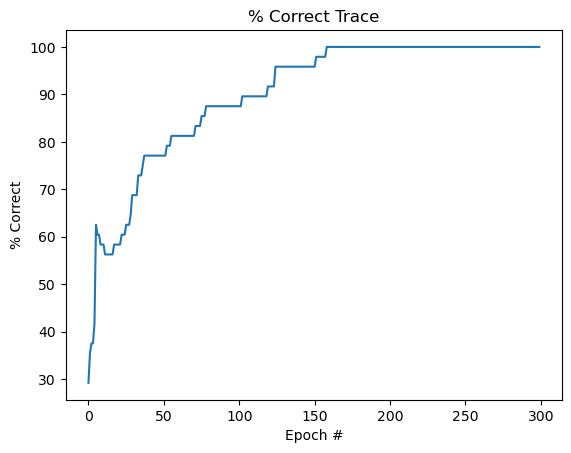

In [286]:
nn.plot_percent_correct_trace()

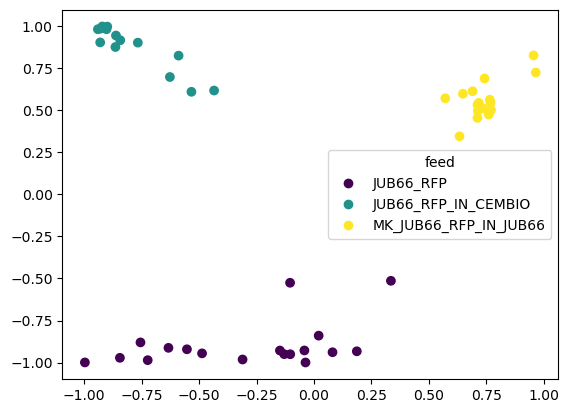

In [287]:
scatter = plt.scatter(nn.Hs[2][:,0], nn.Hs[2][:,1], c=Ttrain[:,0])
plt.legend(handles=scatter.legend_elements()[0], 
           title="feed", labels=target_dict.keys());

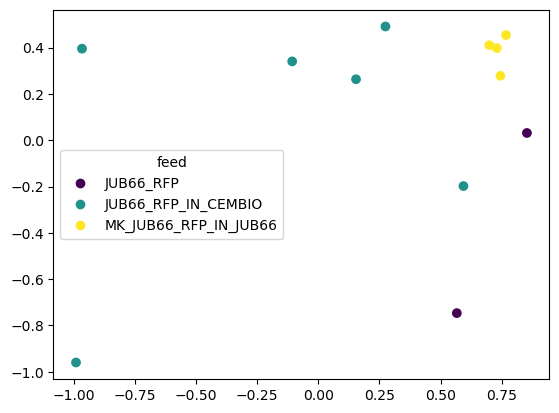

In [291]:
scatter = plt.scatter(nn.Hs[2][:,0], nn.Hs[2][:,1], c=Ttest[:,0])
plt.legend(handles=scatter.legend_elements()[0], 
           title="feed", labels=target_dict.keys());

In [289]:
Y = nn.use(Xtest)[0]

In [290]:
nn.percent_correct(Ttest, Y)

58.333333333333336